<a href="https://colab.research.google.com/github/Twist-tracer/gb-python-libs/blob/master/lesson4/lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Раздел 1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

**Линейный масштаб**

Масштаб при котором расстояние между точками на оси было пропорционально разности значений в этих точках

In [ ]:
x = [1,2,3,4,5,6]
y = [0,1,4,9,16,25]

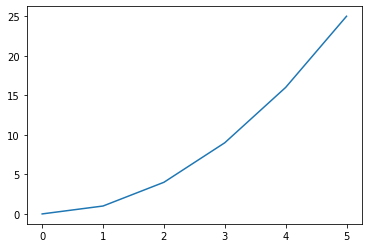

In [ ]:
plt.plot(y)
plt.show()

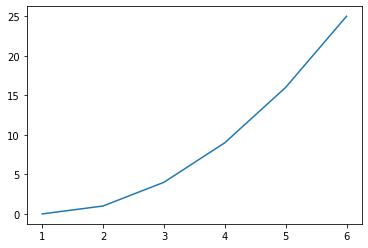

In [ ]:
plt.plot(x,y)
plt.show()

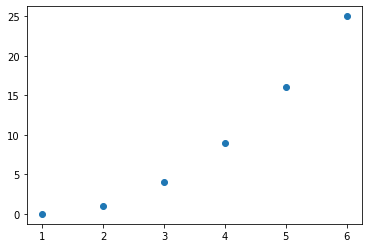

In [ ]:
plt.scatter(x, y)
plt.show()

**Логарифмический масштаб**

In [ ]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
masses = [0.055274, 0.815, 1.0, 0.107, 317.8, 95.0, 14.6, 17.147]

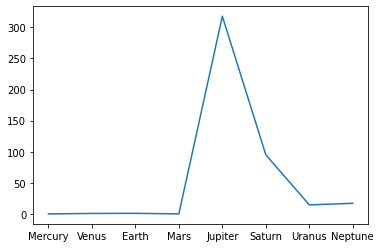

In [ ]:
plt.plot(planets, masses)
plt.show()

In [ ]:
masses[planets.index('Earth')] / masses[planets.index('Mercury')]

18.091688678221225

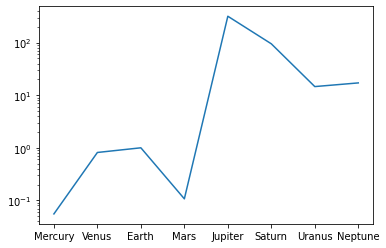

In [ ]:
plt.plot(planets, masses)
plt.yscale(value='log')
plt.show()

In [ ]:
planet_info = pd.Series(masses, index=planets)
planet_info

Mercury      0.055274
Venus        0.815000
Earth        1.000000
Mars         0.107000
Jupiter    317.800000
Saturn      95.000000
Uranus      14.600000
Neptune     17.147000
dtype: float64

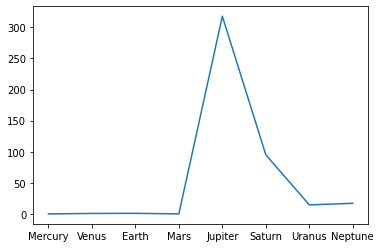

In [ ]:
planet_info.plot()

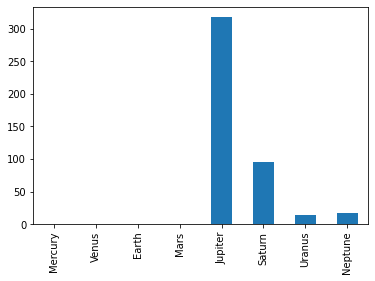

In [ ]:
planet_info.plot.bar()
plt.show()

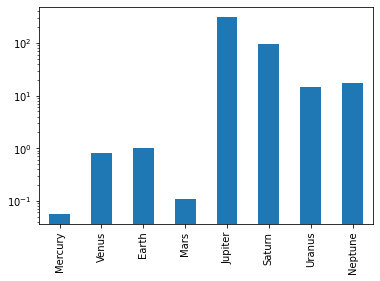

In [ ]:
planet_info.plot.bar(logy=True)
plt.show()

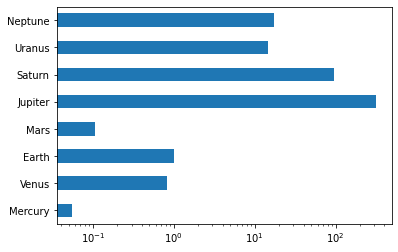

In [ ]:
planet_info.plot(kind='barh', logx=True)
plt.show()

**Построение гистограмм**

In [ ]:
a = [i for i in range(10)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

(array([3., 3., 4.]), array([0., 3., 6., 9.]), <a list of 3 Patch objects>)


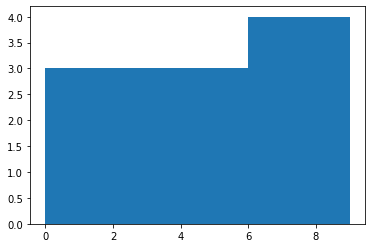

In [ ]:
hist_info = plt.hist(a, bins=3)
print(hist_info)
plt.show()

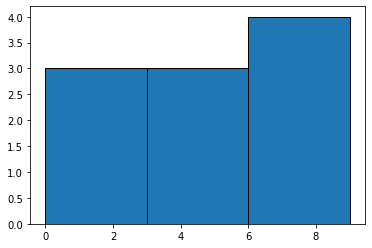

In [ ]:
plt.hist(a, bins=3, edgecolor='black')
plt.show()

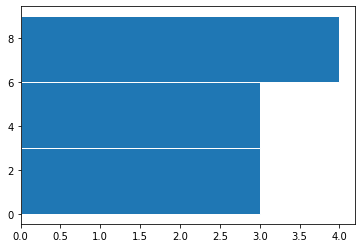

In [ ]:
plt.hist(a, bins=3, orientation='horizontal', ec='white')
plt.show()

**Визуализация данных на примере индекса Биг-мака**

Индекс Биг-мака - неофициальный способ определения паритета покупательной способности

In [ ]:
# Данные с сайта журнала The Economist за январь 2018 года
url='http://infographics.economist.com/2018/databank/BMFile2000toJan2018.xls'

In [ ]:
# С помощью функции read_excel можно читать данные не только из файлов на компьютере,
# но и с веб сервера по ссылке
bmi = pd.read_excel(url)

In [ ]:
bmi.shape

(57, 11)

In [ ]:
bmi.columns

Index(['Country', 'local_price', 'dollar_ex', 'dollar_price', 'dollar_ppp',
       'dollar_valuation', 'dollar_adj_valuation', 'euro_adj_valuation',
       'sterling_adj_valuation', 'yen_adj_valuation', 'yuan_adj_valuation'],
      dtype='object')

In [ ]:
bmi.iloc[:10, :4]

,Country,local_price,dollar_ex,dollar_price
0,Argentina,75.00,18.937500,3.960396
1,Australia,5.90,1.253683,4.706135
2,Brazil,16.50,3.227900,5.111683
3,Britain,3.19,0.722857,4.413046
4,Canada,6.55,1.245900,5.257244
5,Chile,2600.00,605.935000,4.290889
6,China,20.40,6.432000,3.171642
7,Colombia,10900.00,2844.120000,3.832468
8,Costa Rica,2290.00,568.530000,4.027932
9,Czech Republic,79.00,20.747000,3.807779


In [ ]:
bm_price_series = bmi.set_index('Country')['dollar_price']
bm_price_series.head

<bound method NDFrame.head of Country
Argentina         3.960396
Australia         4.706135
Brazil            5.111683
Britain           4.413046
Canada            5.257244
Chile             4.290889
China             3.171642
Colombia          3.832468
Costa Rica        4.027932
Czech Republic    3.807779
Denmark           4.932020
Egypt             1.932768
Euro area         4.835788
Hong Kong         2.621819
Hungary           3.426639
India             2.818611
Indonesia         2.676099
Israel            4.801606
Japan             3.431926
Latvia            3.305475
Lithuania         3.427900
Malaysia          2.276176
Mexico            2.571865
New Zealand       4.510190
Norway            6.241959
Pakistan          3.393512
Peru              3.268991
Philippines       2.641695
Poland            2.965573
Russia            2.290951
Saudi Arabia      3.199744
Singapore         4.385467
South Africa      2.447351
South Korea       4.115034
Sri Lanka         3.771131
Sweden           

<function matplotlib.pyplot.show>

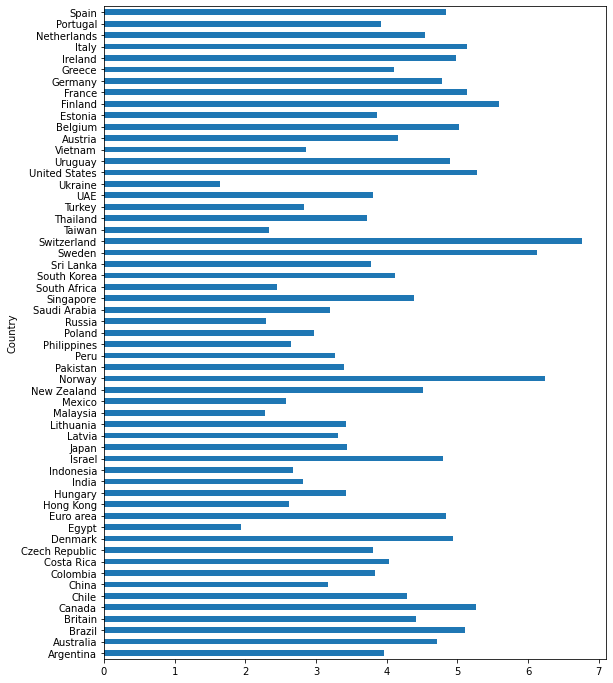

In [ ]:
bm_price_series.plot(kind='barh')
plt.show

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = (9, 12)

<function matplotlib.pyplot.show>

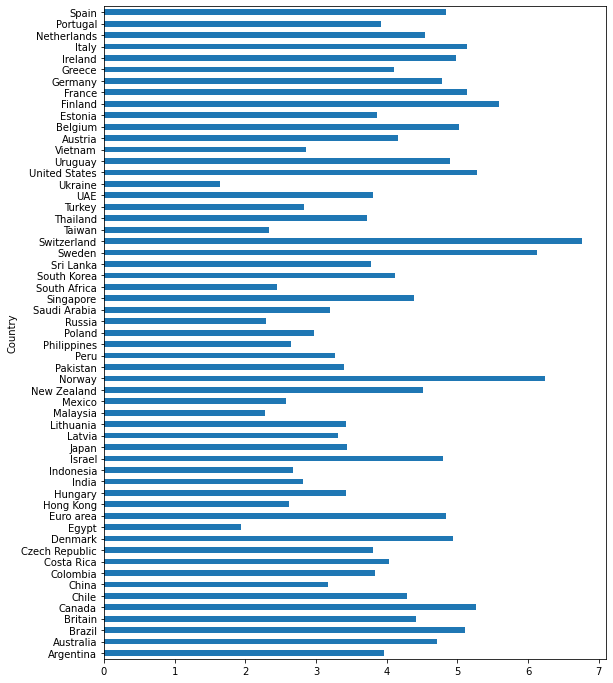

In [ ]:
bm_price_series.plot(kind='barh')
plt.show

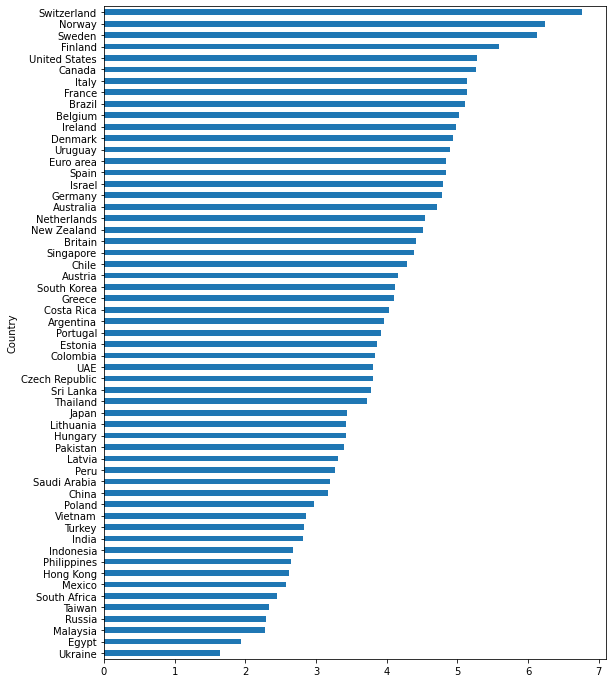

In [ ]:
bm_price_series.sort_values().plot(kind='barh')
plt.show()

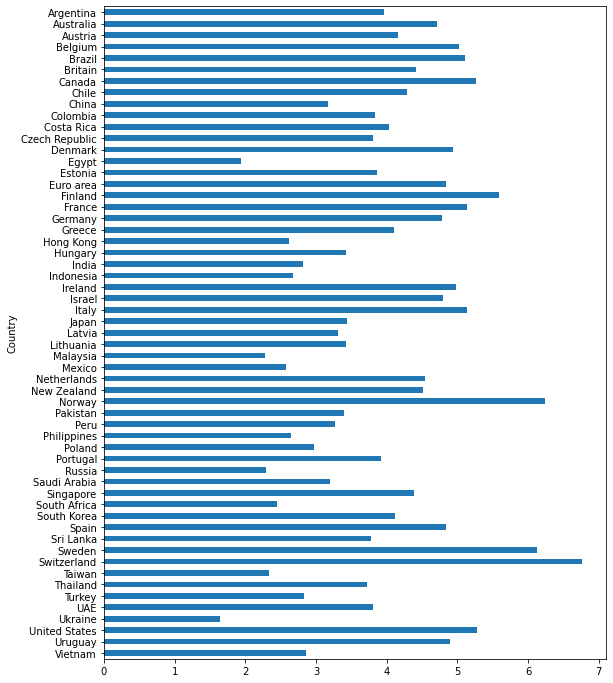

In [ ]:
bm_price_series.sort_index(ascending=False).plot(kind='barh')
plt.show()

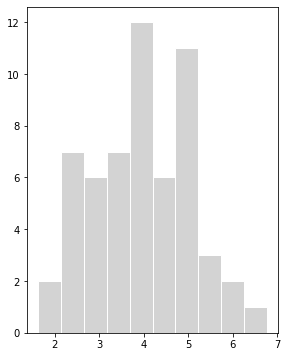

In [ ]:
rcParams['figure.figsize'] = 4.5, 6
plt.hist(bm_price_series, ec='white', color='lightgray')
plt.show()

**Сохранение графиков в файл**

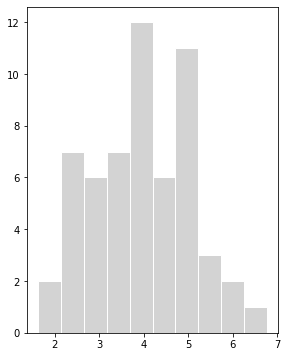

In [ ]:
plt.hist(bm_price_series, ec='white', color='lightgray')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/img/BM_price', fmt='png')

# Раздел 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 6, 4.5

**Формирование текста для графика**

In [ ]:
x = np.linspace(-5, 5, 101)
x

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

In [ ]:
x2 = x**2
x2

array([2.500e+01, 2.401e+01, 2.304e+01, 2.209e+01, 2.116e+01, 2.025e+01,
       1.936e+01, 1.849e+01, 1.764e+01, 1.681e+01, 1.600e+01, 1.521e+01,
       1.444e+01, 1.369e+01, 1.296e+01, 1.225e+01, 1.156e+01, 1.089e+01,
       1.024e+01, 9.610e+00, 9.000e+00, 8.410e+00, 7.840e+00, 7.290e+00,
       6.760e+00, 6.250e+00, 5.760e+00, 5.290e+00, 4.840e+00, 4.410e+00,
       4.000e+00, 3.610e+00, 3.240e+00, 2.890e+00, 2.560e+00, 2.250e+00,
       1.960e+00, 1.690e+00, 1.440e+00, 1.210e+00, 1.000e+00, 8.100e-01,
       6.400e-01, 4.900e-01, 3.600e-01, 2.500e-01, 1.600e-01, 9.000e-02,
       4.000e-02, 1.000e-02, 0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02,
       1.600e-01, 2.500e-01, 3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01,
       1.000e+00, 1.210e+00, 1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00,
       2.560e+00, 2.890e+00, 3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00,
       4.840e+00, 5.290e+00, 5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00,
       7.840e+00, 8.410e+00, 9.000e+00, 9.610e+00, 

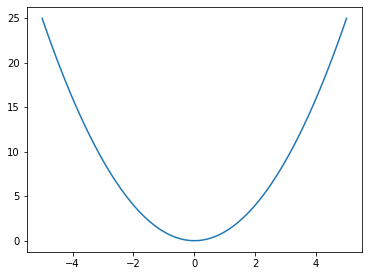

In [ ]:
plt.plot(x, x2)
plt.show()

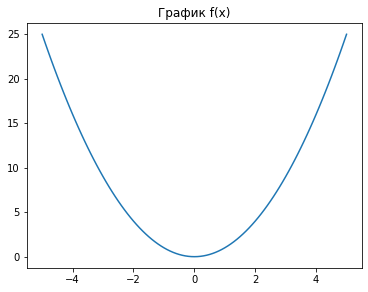

In [ ]:
plt.plot(x,x2)
plt.title('График f(x)')
plt.show()

Поменяем настройки для большей четкости графиков

In [ ]:
# SVG (Scalable Vector Graphics) - масштабируемая векторная графика
%config InlineBackend.figure_format = 'svg'

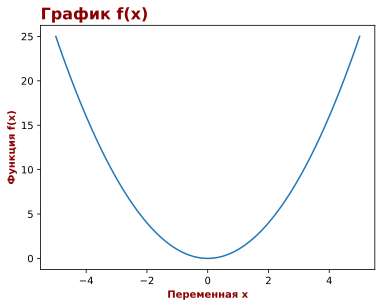

In [ ]:
plt.plot(x,x2)

plt.title('График f(x)', fontdict={'fontsize':16, 'fontweight':'bold', 'color':'DarkREd'}, loc='left')

plt.xlabel ('Переменная x', fontdict={'fontsize':10, 'fontweight':'bold', 'color':'DarkREd'})
plt.ylabel('Функция f(x)', fontdict={'fontsize':10, 'fontweight':'bold', 'color':'DarkREd'})

plt.show()

In [ ]:
x3 = x**3
x3

array([-1.25000e+02, -1.17649e+02, -1.10592e+02, -1.03823e+02,
       -9.73360e+01, -9.11250e+01, -8.51840e+01, -7.95070e+01,
       -7.40880e+01, -6.89210e+01, -6.40000e+01, -5.93190e+01,
       -5.48720e+01, -5.06530e+01, -4.66560e+01, -4.28750e+01,
       -3.93040e+01, -3.59370e+01, -3.27680e+01, -2.97910e+01,
       -2.70000e+01, -2.43890e+01, -2.19520e+01, -1.96830e+01,
       -1.75760e+01, -1.56250e+01, -1.38240e+01, -1.21670e+01,
       -1.06480e+01, -9.26100e+00, -8.00000e+00, -6.85900e+00,
       -5.83200e+00, -4.91300e+00, -4.09600e+00, -3.37500e+00,
       -2.74400e+00, -2.19700e+00, -1.72800e+00, -1.33100e+00,
       -1.00000e+00, -7.29000e-01, -5.12000e-01, -3.43000e-01,
       -2.16000e-01, -1.25000e-01, -6.40000e-02, -2.70000e-02,
       -8.00000e-03, -1.00000e-03,  0.00000e+00,  1.00000e-03,
        8.00000e-03,  2.70000e-02,  6.40000e-02,  1.25000e-01,
        2.16000e-01,  3.43000e-01,  5.12000e-01,  7.29000e-01,
        1.00000e+00,  1.33100e+00,  1.72800e+00,  2.197

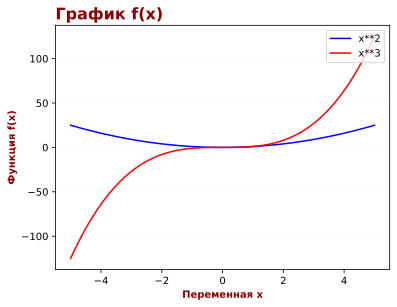

In [ ]:
plt.plot(x,x2, color='blue', label='x**2')
plt.plot(x,x3, color='red', label='x**3')

plt.title('График f(x)', fontdict={'fontsize':16, 'fontweight':'bold', 'color':'DarkREd'}, loc='left')

plt.xlabel('Переменная x', fontdict={'fontsize':10, 'fontweight':'bold', 'color':'DarkREd'})
plt.ylabel('Функция f(x)', fontdict={'fontsize':10, 'fontweight':'bold', 'color':'DarkREd'})

plt.legend(loc='upper right', frameon=True)

plt.grid(axis='y', color='ghostwhite')
plt.show()

# Раздел 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
x = np.linspace(-5, 5, 101)
x2 = x**2
x3 = x**3

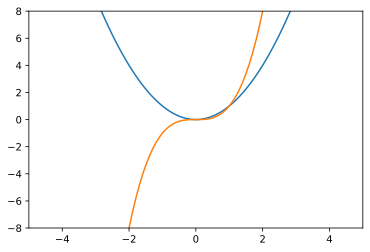

In [ ]:
plt.axis([-5, 5, -8, 8])
plt.plot(x, x2)
plt.plot(x, x3)

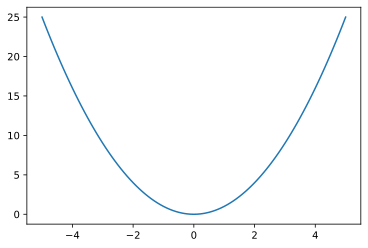

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, x2)

**Объекты figure и axes**

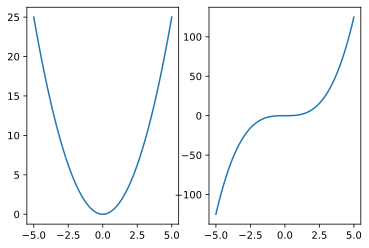

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax
ax1.plot(x, x2)
ax2.plot(x, x3)

In [ ]:
y = np.sin(x)
z = np.cos(x)

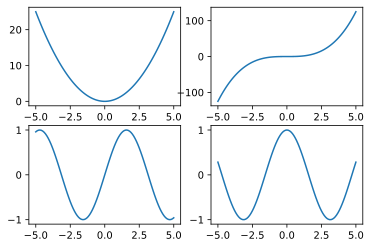

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(x, x2)
ax2.plot(x, x3)
ax3.plot(x, y)
ax4.plot(x, z)